In [42]:
#import required modules
from pandas_profiling import ProfileReport
import missingno as msno

import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import math

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Pre-Processing libraries
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import FeatureUnion, Pipeline

#Sk-Learn Models
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

#Sk-Learn Model Selection
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV, RandomizedSearchCV, train_test_split, StratifiedKFold
from sklearn.feature_selection import RFECV, RFE
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

# from imblearn.over_sampling import SMOTE

from scipy import stats

In [2]:
student_info = pd.read_csv("C:\\Users\\HUY LOL\\Downloads\\OULAD\\Model\\student_info.csv")
student_info = student_info.drop(['Unnamed: 0'], axis = 1)
student_info

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,...,Before_Click,Access_Vle,date_registration,date_unregistration,module_presentation_length,Year,Starting_month,Late_submission,Code_Category,learn_again
0,AAA,2013J,11391,M,East Anglian Region,Higher than A level,90-100%,55<=,0,77.0,...,98.0,Yes,159.0,No,268,2013,February,0.0,Social_Science,No
1,AAA,2013J,28400,F,Scotland,Higher than A level,20-30%,35-55,0,60.0,...,215.0,Yes,53.0,No,268,2013,February,2.0,Social_Science,No
2,AAA,2013J,30268,F,North Western Region,A Level,30-40%,35-55,0,60.0,...,102.0,Yes,92.0,Yes,268,2013,February,12.0,Social_Science,No
3,AAA,2013J,31604,F,South East Region,A Level,50-60%,35-55,0,60.0,...,169.0,Yes,52.0,No,268,2013,February,0.0,Social_Science,No
4,AAA,2013J,32885,F,West Midlands Region,Lower than A level,50-60%,0-35,0,60.0,...,295.0,Yes,176.0,No,268,2013,February,5.0,Social_Science,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower than A level,10-20%,0-35,0,30.0,...,2.0,Yes,4.0,No,269,2014,February,12.0,Social_Science,No
32589,GGG,2014J,2645731,F,East Anglian Region,Lower than A level,40-50%,35-55,0,30.0,...,0.0,Yes,23.0,No,269,2014,February,2.0,Social_Science,No
32590,GGG,2014J,2648187,F,South Region,A Level,20-30%,0-35,0,30.0,...,15.0,Yes,129.0,No,269,2014,February,0.0,Social_Science,No
32591,GGG,2014J,2679821,F,South East Region,Lower than A level,90-100%,35-55,0,30.0,...,65.0,Yes,49.0,Yes,269,2014,February,0.0,Social_Science,No


# Data Pre-Processing Pipeline

### Feature Extraction

In [3]:
data = student_info.drop(["module_presentation_length","Year","code_presentation","Starting_month","id_student","num_of_prev_attempts","sum_click","Access_Vle"], axis = 1)

### Train Test split

In [25]:
feature = data.drop(['final_result'], axis = 1)
target  = data['final_result'].values

train,test= train_test_split(data, test_size=0.25,random_state=123, stratify=data.final_result)# stratify the outcome


In [6]:
# categorical columns and numeric al columns
numeric_cols = data.select_dtypes(["int","float"]).columns.tolist()
category_cols = data.select_dtypes("object").columns.tolist()
print(numeric_cols)
print(category_cols)

['studied_credits', 'After_Click', 'Before_Click', 'date_registration', 'Late_submission']
['code_module', 'gender', 'region', 'highest_education', 'imd_band', 'age_band', 'disability', 'final_result', 'date_unregistration', 'Code_Category', 'learn_again']


### Feature Encoding

In [22]:
#Transform Categorical columns
class DummyEncoding( BaseEstimator, TransformerMixin):
    
    #Class Constructor
    def __init__(self, category_cols):
        self.category_cols = category_cols
        
    #Return self nothing else to do here
    def fit(self, X, y = None):
        return self

    #Transformer method we wrote for this transformer 
    def transform(self, X , y = None ):
        #One-Hot Encoding of categorical columns
        #Get dummy variables
        for each_col in self.category_cols:
            X[each_col] = pd.factorize(X[each_col])[0]
        return X

### Feature Scaling

In [23]:
#Custom Transformer that scales Numerical columns
class CustomScaler( BaseEstimator, TransformerMixin):
    
    #Class Constructor
    def __init__(self, numeric_cols):
        self.numeric_cols = numeric_cols
        self.scaler = MinMaxScaler()
        
    #Return self nothing else to do here
    def fit( self, X, y = None  ):
        
        self.scaler.fit(X[numeric_cols])
        return self
    
    #Transformer method we wrote for this transformer 
    def transform(self, X , y = None ):
        X[numeric_cols] = self.scaler.transform(X[numeric_cols])
        return X

### Preprocessing pipeline


In [31]:
#Defining the steps in the categorical pipeline 
categorical_pipeline = Pipeline( steps = [('dummyEncodingTransformer', DummyEncoding(category_cols))])
#Defining the steps in the numerical pipeline     
numerical_pipeline = Pipeline( steps = [ ( 'min_max_scaler', CustomScaler(numeric_cols)) ] )
#Combining numerical and categorical piepline into one full big pipeline horizontally 
#using FeatureUnion
preProcessingPipeline = Pipeline( steps = [ ( 'categorical_pipeline', categorical_pipeline ), 
                                                  
                                            ( 'numerical_pipeline', numerical_pipeline )])


In [26]:
#Fit_transform the pipeline on training data
train_transform = preProcessingPipeline.fit_transform(train)
#Transform the pipeline on test data
test_transform = preProcessingPipeline.transform(test)

In [27]:
train_transform

,code_module,gender,region,highest_education,imd_band,age_band,studied_credits,disability,final_result,After_Click,Before_Click,date_registration,date_unregistration,Late_submission,Code_Category,learn_again
4548,0,0,0,0,0,0,0.166667,0,0,0.012265,0.000000,0.012461,0,0.333333,0,0
26846,1,1,1,1,0,0,0.333333,0,1,0.000000,0.000000,0.445483,1,1.000000,1,0
27514,1,1,2,1,1,0,0.166667,0,0,0.097355,0.035915,0.068536,0,0.000000,1,0
17561,2,0,1,0,2,0,0.666667,0,1,0.004472,0.002144,0.208723,1,0.000000,1,1
26238,1,1,3,2,3,0,0.166667,0,1,0.008901,0.011525,0.049844,0,1.000000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9982,3,1,8,1,8,0,0.166667,1,1,0.008773,0.000000,0.252336,1,0.083333,1,0
21037,4,1,5,1,5,0,0.166667,0,1,0.052298,0.056821,0.065421,1,0.000000,1,0
11598,3,0,2,1,6,0,0.000000,0,1,0.008518,0.000536,0.302181,1,0.083333,1,0
8257,0,1,0,1,3,1,0.166667,0,1,0.000000,0.000000,0.118380,1,1.000000,0,0


### Extract X and y

In [34]:
# Putting response variable to y
X_train =train.drop(["final_result"], axis = 1)
y_train = train['final_result'].values
# Putting response variable to y
X_test = test.drop(["final_result"], axis = 1)
y_test = test['final_result'].values


# Model Class

In [93]:
#List of models to evaluate
models = [{"modelName": "LogisticRegression", 
           "model": LogisticRegression(), 
           "modelAvgCVScore": 10, 
        #    "modelParams": paramsLogReg, 
           "cvResults": [], 
           "rfeStatus": True, 
           "rfeModels": [], 
           "rfeInputFeaturesCount": [], 
           "RFECVResults": []
          },
          
          {"modelName": "Ridge", 
           "model": RidgeClassifier(), 
           "modelAvgCVScore": 11, 
        #    "modelParams": paramsRidge, 
           "cvResults": [], 
           "rfeStatus": True, 
           "rfeModels": [], 
           "rfeInputFeaturesCount": [], 
           "RFECVResults": []},
          
          {"modelName": "SGD", 
           "model": SGDClassifier(), 
           "modelAvgCVScore": 9, 
        #    "modelParams": paramsSGD, 
           "cvResults": [], 
           "rfeStatus": True, 
           "rfeModels": [], 
           "rfeInputFeaturesCount": [], 
           "RFECVResults": []
          },
          
          {"modelName": "KNN", 
           "model": KNeighborsClassifier(), 
           "modelAvgCVScore": 0, 
        #    "modelParams": paramsKNN, 
           "cvResults": [], 
           "rfeStatus": False, 
           "rfeModels": [], 
           "rfeInputFeaturesCount": [], 
           "RFECVResults": []
          },
          
          {"modelName": "DecisionTree", 
           "model": DecisionTreeClassifier(), 
           "modelAvgCVScore": 0, 
        #    "modelParams": paramsDT, 
           "cvResults": [], 
           "rfeStatus": True, 
           "rfeModels": [], 
           "rfeInputFeaturesCount": [], 
           "RFECVResults": []
          },
        
          {"modelName": "RandomForest", 
           "model": RandomForestClassifier(n_estimators = 100), 
           "modelAvgCVScore": 0, 
           "modelParams": paramsRF, 
           "cvResults": [], 
           "rfeStatus": True, 
           "rfeModels": [], 
           "rfeInputFeaturesCount": [], 
           "RFECVResults": []
          },
          
          {"modelName": "BaggingClassifier", 
           "model": BaggingClassifier(), 
           "modelAvgCVScore": 0, 
        #    "modelParams": paramsBC, 
           "cvResults": [], 
           "rfeStatus": True, 
           "rfeModels": [], 
           "rfeInputFeaturesCount": [], 
           "RFECVResults": []
          }
          
      #     {"modelName": "BoostingClassifier", 
      #      "model": GradientBoostingClassifier(), 
      #      "modelAvgCVScore": 0, 
      #   #    "modelParams": paramsGBC, 
      #      "cvResults": [], 
      #      "rfeStatus": True, 
      #      "rfeModels": [], 
      #      "rfeInputFeaturesCount": [], 
      #      "RFECVResults": []
      #     }
          
         ]

In [64]:
#Minimun number of features for RFE
min_features = 2

#Maximum number of features for RFE
max_features = X_train.shape[1]

#Step size in RFECV
rfecvStep = 3

#Perform manual RFE
rfeStatus = False

#Perform Auto RFE
rfeCVStatus = True

In [65]:
#Scoring parameter
scoring = "accuracy"

#Number of splits in K-Fold Cross Validation
n_splits = 10

#Random state
random_state = 123

#Shuffle in K-Fold cross validation
shuffle = True

In [90]:
class Models:
    
    #Init Function
    def __init__(self, models, min_features, max_features, rfecvStep, scoring, n_splits, random_state, shuffle, rfeStatus, rfeCVStatus):
        
        self.models = models
        self.min_features = min_features
        self.max_features = max_features
        self.scoring = scoring
        self.n_splits = n_splits
        self.random_state = random_state
        self.shuffle = shuffle
        self.rfecvStep = rfecvStep
        self.rfeStatus = rfeStatus
        self.rfeCVStatus = rfeCVStatus
    
    #K-Fold Cross validation
    def crossValidation(self, model, X, y):
        #Instantiate KFold
        kfold = KFold(n_splits=self.n_splits, random_state=self.random_state, shuffle=self.shuffle)
        return cross_val_score(model, X, y, cv=kfold, scoring=self.scoring)
    
    #Function to runModels
    def runModels(self, X, y):
        
        print("Starting to execute and compare various models...")
        #Loop over each model and do K-Fold Cross validation to select the best model
        for each_model in self.models:
            print("Running {}".format(each_model["modelName"]))
            
            #List of CV results of each model
            each_model["cvResults"] = self.crossValidation(each_model["model"], X, y)
            
            #Average CV score
            each_model["modelAvgCVScore"] = each_model["cvResults"].mean()
            
            
            if math.isnan(each_model["modelAvgCVScore"]):
                each_model["modelAvgCVScore"] = 0

        print("All models successfully executed")
    
    #Function to compare Model results        
    def compareModels(self, results, names):
        
        #Print results of various models
        for each_result, modelName in zip(results, names):
            print("Model Name: %s:" % (modelName))
            print("Model Average CV Score: %f" % (each_result.mean()))
            print("Model CV Std (%f)" % (each_result.std())) 
            print("CV_Results: ", (each_result))
            print("\n")
        
        # Box Plot of Model Results
        fig = plt.figure()
        fig.suptitle('Algorithm Comparison')
        ax = fig.add_subplot(111)
        plt.boxplot(results)
        ax.set_xticklabels(names)
        plt.xticks(rotation=45)
        plt.show()
        
    #Get shortlisted Model
    def getShortlistedModel(self):
        
        #Get shortlisted model based on highest average CV Score
        self.shortlistedModel = max(self.models, key=lambda x:x['modelAvgCVScore'])
        
        print("Shortlisted model is : ", self.shortlistedModel)
            
            
    #Function to run RFE models and return the CV results
    def runRFEModels(self, X, y):
        
        results = []
        
        print("These are the models: ", self.shortlistedModel["rfeModels"])
        
        if ((self.rfeStatus == True) and (self.shortlistedModel["rfeStatus"] == True)):
        
            #Loop over the rfe models for the shortlisted model
            for each_model in self.shortlistedModel["rfeModels"]:
            
                #CV results of each model
                cvResults = self.crossValidation(each_model, X, y)
                print("Average score is : ", cvResults.mean())
            
                results.append(cvResults)
            
        return results
            
            
    #Get the list of RFE Models
    def getRfeModels(self):

        #Perform RFE on the model
        for i in range(self.min_features, self.max_features):
            rfe = RFE(estimator=self.shortlistedModel["model"], n_features_to_select=i)
            self.shortlistedModel["rfeModels"].append(Pipeline(steps=[('selection',rfe),('model',self.shortlistedModel["model"])]))
            self.shortlistedModel["rfeInputFeaturesCount"].append(i)

                    
    #Set optimial number of features based on RFE Model
    def getOptimalNumFeatures(self):
#         self.shortlistedModel[]

        #It is an array of arrays with each nested array containing CV results
        results = modelObj.shortlistedModel["RFECVResults"]
        meanResults = [x.mean() for x in results]
        maxpos = meanResults.index(max(meanResults)) 

        self.optimalFeatures =  list(range(self.min_features, self.max_features))[maxpos]

    
    #Run shortlisted RFE Model with optimal number of features to actually get feature names
    def getBestFeatures(self, X, y):
        
        
        rfe = RFE(estimator=self.shortlistedModel["model"], n_features_to_select=self.optimalFeatures)
        self.pipe = Pipeline(steps=[('selection',rfe), ('model', self.shortlistedModel["model"])])
        self.pipe.fit(X, y)

        # summarize all features
        print("Summarizing the results of RFE")
        for each_col, col_num in zip(X.columns, list(range(X.shape[1]))):
            print('ColumnName: %s | Selected %s | Rank: %.3f' % (each_col, rfe.support_[col_num], rfe.ranking_[col_num]))


        print("\n")
        print("List of selected columns")
        print(list(zip(X.columns,rfe.support_,rfe.ranking_)))

        #Visualize the selected columns
        print("\n")
        print("Visualize selected columns")
        print(X.columns[rfe.support_])

        return X.columns[rfe.support_]
        
    
    #Run RFECV Model to find the names of optimal features
    def getBestFeaturesCV(self, X, y):

        rfecv = RFECV(estimator=self.shortlistedModel["model"], step=self.rfecvStep, cv=self.n_splits)

        self.pipe = Pipeline(steps=[('selection',rfecv), ('model', self.shortlistedModel["model"])])
        self.pipe.fit(X, y)

        # summarize all features
        print("Summarizing the results of RFE")
        for each_col, col_num in zip(X.columns, list(range(X.shape[1]))):
            print('ColumnName: %s | Selected %s | Rank: %.3f' % (each_col, rfecv.support_[col_num], rfecv.ranking_[col_num]))


        print("\n")
        print("List of selected columns")
        print("this is rfecv support: ", rfecv.support_)
        print(list(zip(X.columns,rfecv.support_,rfecv.ranking_)))

        #Visualize the selected columns
        print("\n")
        print("Visualize selected columns")
        print(X.columns[rfecv.support_])

        return X.columns[rfecv.support_]
    
        
    def getParams(self, modelName):
        
        for each_param in self.params:
            
            if each_param["modelName"] == modelName:
                return each_param["modelParams"]
            
            else:
                return 0
               
    def hyperParameterOptimization(self):
        # Instantiate the grid search model
        grid_search = GridSearchCV(estimator=self.shortlistedModel["model"], 
                           param_distributions=self.shortlistedModel["modelParams"], 
                           cv=self.n_splits, n_jobs=-1, verbose=1, scoring = self.scoring)
        
        grid_search.fit(X_train, y_train)
        
        return grid_search.best_estimator_
    
    def runFinalModel(self):
        pass
    
    def evaluateModel(self):
        pass

In [67]:
modelObj = Models(models, min_features, max_features, rfecvStep, scoring, n_splits, random_state, shuffle, rfeStatus, rfeCVStatus)

In [68]:
modelObj.runModels(X_train, y_train)

Starting to execute and compare various models...
Running LogisticRegression
Running Ridge
Running SGD
Running KNN
Running DecisionTree
Running RandomForest
Running BaggingClassifier
All models successfully executed


In [69]:
#Store CV results and names of various models
results = [x["cvResults"] for x in modelObj.models]
names = [x["modelName"] for x in modelObj.models]

Model Name: LogisticRegression:
Model Average CV Score: 0.848224
Model CV Std (0.008288)
CV_Results:  [0.84826176 0.83803681 0.85030675 0.86298569 0.83674304 0.85270049
 0.85351882 0.85065466 0.83592471 0.85310966]


Model Name: Ridge:
Model Average CV Score: 0.829937
Model CV Std (0.007989)
CV_Results:  [0.83844581 0.82331288 0.83067485 0.84171779 0.81914894 0.8301964
 0.83387889 0.83715221 0.81587561 0.8289689 ]


Model Name: SGD:
Model Average CV Score: 0.836400
Model CV Std (0.017270)
CV_Results:  [0.85030675 0.82290389 0.84498978 0.86421268 0.80360065 0.84615385
 0.81996727 0.82569558 0.83551555 0.85065466]


Model Name: KNN:
Model Average CV Score: 0.778023
Model CV Std (0.008366)
CV_Results:  [0.78773006 0.77546012 0.7803681  0.7807771  0.77332242 0.79214403
 0.76513912 0.76513912 0.77659574 0.78355155]


Model Name: DecisionTree:
Model Average CV Score: 0.839920
Model CV Std (0.004583)
CV_Results:  [0.84171779 0.83394683 0.84294479 0.84458078 0.83306056 0.84819967
 0.8408347  0

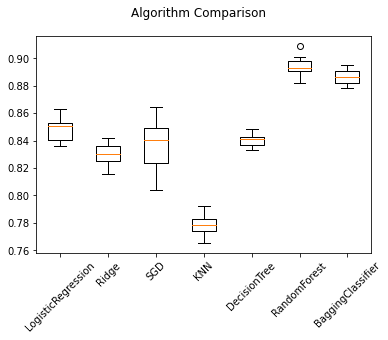

In [70]:
#Plot the results
modelObj.compareModels(results, names)

### Best Model

In [77]:
#Set the shortlisted Model
modelObj.getShortlistedModel()

Shortlisted model is :  {'modelName': 'RandomForest', 'model': RandomForestClassifier(), 'modelAvgCVScore': 0.8938386901355182, 'cvResults': array([0.89120654, 0.89038855, 0.89161554, 0.90920245, 0.88543372,
       0.89525368, 0.89361702, 0.898527  , 0.88216039, 0.900982  ]), 'rfeStatus': True, 'rfeModels': [], 'rfeInputFeaturesCount': [], 'RFECVResults': []}


In [78]:
#Get the List of RFE Models based on number of features and the shortlisted model

if ((modelObj.rfeStatus == True) and (modelObj.shortlistedModel["rfeStatus"] == True)):
   
    #Get RFE Models
    modelObj.getRfeModels()
    
    #Run RFE Models and get rfeCVResults
    modelObj.shortlistedModel["RFECVResults"] = modelObj.runRFEModels(X_train, y_train)
    
    #Compare RFE Model results
    modelObj.compareModels(modelObj.shortlistedModel["RFECVResults"], list(range(modelObj.min_features, modelObj.max_features)))
    
    #Select the best performing RFE Model and number of features
    modelObj.getOptimalNumFeatures()
    
    #Get the names of selected columns by RFE
    selectColumns = modelObj.getBestFeatures(X_train, y_train)

In [79]:
#View the shortlisted Model
modelObj.shortlistedModel

{'modelName': 'RandomForest',
 'model': RandomForestClassifier(),
 'modelAvgCVScore': 0.8938386901355182,
 'cvResults': array([0.89120654, 0.89038855, 0.89161554, 0.90920245, 0.88543372,
        0.89525368, 0.89361702, 0.898527  , 0.88216039, 0.900982  ]),
 'rfeStatus': True,
 'rfeModels': [],
 'rfeInputFeaturesCount': [],
 'RFECVResults': []}

### Feature Selection

In [80]:
#Check if rfeCVStatus == True
if ((modelObj.rfeCVStatus == True) and (modelObj.shortlistedModel["rfeStatus"] == True)):
    selectColumns = modelObj.getBestFeaturesCV(X_train, y_train)

Summarizing the results of RFE
ColumnName: code_module | Selected True | Rank: 1.000
ColumnName: gender | Selected False | Rank: 2.000
ColumnName: region | Selected True | Rank: 1.000
ColumnName: highest_education | Selected False | Rank: 2.000
ColumnName: imd_band | Selected True | Rank: 1.000
ColumnName: age_band | Selected False | Rank: 3.000
ColumnName: studied_credits | Selected True | Rank: 1.000
ColumnName: disability | Selected False | Rank: 3.000
ColumnName: After_Click | Selected True | Rank: 1.000
ColumnName: Before_Click | Selected True | Rank: 1.000
ColumnName: date_registration | Selected True | Rank: 1.000
ColumnName: date_unregistration | Selected True | Rank: 1.000
ColumnName: Late_submission | Selected True | Rank: 1.000
ColumnName: Code_Category | Selected False | Rank: 2.000
ColumnName: learn_again | Selected False | Rank: 3.000


List of selected columns
this is rfecv support:  [ True False  True False  True False  True False  True  True  True  True
  True False Fa

In [81]:
#If we are doing Recursive Feature Elimination
if (((modelObj.rfeStatus == True) or (modelObj.rfeCVStatus == True)) and (modelObj.shortlistedModel["rfeStatus"] == True)):
    X_train_rfe = X_train[selectColumns]
    X_test_rfe = X_test[selectColumns]
    
else:
    X_train_rfe = X_train
    X_test_rfe = X_test

In [82]:
X_train_rfe

,code_module,region,imd_band,studied_credits,After_Click,Before_Click,date_registration,date_unregistration,Late_submission
4548,0,0,0,0.166667,0.012265,0.000000,0.012461,0,0.333333
26846,1,1,0,0.333333,0.000000,0.000000,0.445483,1,1.000000
27514,1,2,1,0.166667,0.097355,0.035915,0.068536,0,0.000000
17561,2,1,2,0.666667,0.004472,0.002144,0.208723,1,0.000000
26238,1,3,3,0.166667,0.008901,0.011525,0.049844,0,1.000000
...,...,...,...,...,...,...,...,...,...
9982,3,8,8,0.166667,0.008773,0.000000,0.252336,1,0.083333
21037,4,5,5,0.166667,0.052298,0.056821,0.065421,1,0.000000
11598,3,2,6,0.000000,0.008518,0.000536,0.302181,1,0.083333
8257,0,0,3,0.166667,0.000000,0.000000,0.118380,1,1.000000


In [91]:
paramsRF = {'n_estimators': [25, 50, 100, 150, 200], 
            'max_depth': [2, 3, 5, 10, 20], 
            'max_features': ["auto", "sqrt", "log2"], 
            'random_state': [42]
           }

In [94]:
finalModel = modelObj.hyperParameterOptimization()

KeyError: 'modelParams'